In [63]:
# For Basic Operations
import numpy as np
import pandas as pd

# for Datetime Manipulation
import datetime

# For Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for Interactive Analysis
from ipywidgets import interact

In [64]:
# lets import the Dataset
data = pd.read_csv('products.csv')

# lets check the shape of the dataset
data.shape

(2210, 3)

In [65]:
# lets check the head of the dataset
data.head()

,productId,Name,category
0,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese
1,SEND00496,180 Degrees Parmesan Oat Crackers 135g,Snack|Crackers-Forcheese
2,SEND00133,280G MRS MACS BIG AUSSIE SAUSAGE ROLL,Health|Medicine-FirstAid
3,SEND00596,3M MASKS 3 PACK,Health|Medicine-Body
4,SEND00106,50G Cadbury Crunchie,Confectionary|Chocolate-Everyday


In [66]:
# lets also check the freq dataset
rating = pd.read_csv('freq.csv')

# lets check the shape also
rating.shape

(167903, 5)

In [67]:

rating.head()

,User Id,productId,order month,freq,timestamp
0,0a0bbc4b-127a-4f50-9199-1ce17dcfecef,SEND00639,March,1,44644
1,0a0bbc4b-127a-4f50-9199-1ce17dcfecef,SEND00864,March,1,44644
2,0a0bbc4b-127a-4f50-9199-1ce17dcfecef,SEND00974,March,1,44644
3,0a0bbc4b-127a-4f50-9199-1ce17dcfecef,SEND01105,April,1,44653
4,0a0bbc4b-127a-4f50-9199-1ce17dcfecef,SEND01154,April,1,44653


In [68]:
# As we are going to Perform the Content Based Filtering
# lets merge the data and rating
data = pd.merge(data, rating, on = 'productId', how = 'inner')

# lets check the shape of the Merged Dataset
data.shape

(165406, 7)

In [69]:
# Lets check the Head of the Merged Dataset
data.head(10)

,productId,Name,category,User Id,order month,freq,timestamp
0,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,1f81b675-9fd2-4be7-b6f7-644631658d2f,October,1,44478
1,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,2f71ae71-98dc-44fb-b7b4-ec55f93e5230,January,1,44585
2,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,3dd7256f-9c91-4fd5-abec-b024687f963c,October,1,44471
3,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,7a1ad23c-e088-4726-a747-ed1f9ab76798,January,1,44578
4,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,8c5c66ff-af6d-4be7-ad15-4d67b77f08b7,December,1,44548
5,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,9e199d2e-1355-4e73-a6d9-3b258eb49405,March,1,44623
6,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,27e8eed6-d150-488f-824d-9f6aa36110dc,December,1,44535
7,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,28de3547-29ab-411f-9f09-2ba96a432046,November,1,44524
8,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,56c8a694-44a1-4008-9945-fe3eaf62198c,January,1,44586
9,SEND00495,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,71d3de95-d48f-4611-a590-a63dac4ba87e,March,1,44645


In [70]:

data = data.drop(['productId', 'User Id', 'timestamp'], axis = 1)

# lets check the head of the Final Dataset
data.head()

,Name,category,order month,freq
0,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,October,1
1,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,January,1
2,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,October,1
3,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,January,1
4,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,December,1


In [71]:
# Now, We Have to Groupby the Dataset Based on the product name

data = pd.pivot_table(data, index = ['Name','category'], aggfunc = 'mean')
data.reset_index(level=['Name','category'], inplace = True)
data.head()

,Name,category,freq
0,180 Degrees Almond Oat Crackers 150g,Snack|Crackers-Forcheese,1.222222
1,180 Degrees Parmesan Oat Crackers 135g,Snack|Crackers-Forcheese,1.338462
2,280G MRS MACS BIG AUSSIE SAUSAGE ROLL,Health|Medicine-FirstAid,1.095238
3,3M MASKS 3 PACK,Health|Medicine-Body,1.025000
4,50G Cadbury Crunchie,Confectionary|Chocolate-Everyday,1.146341


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


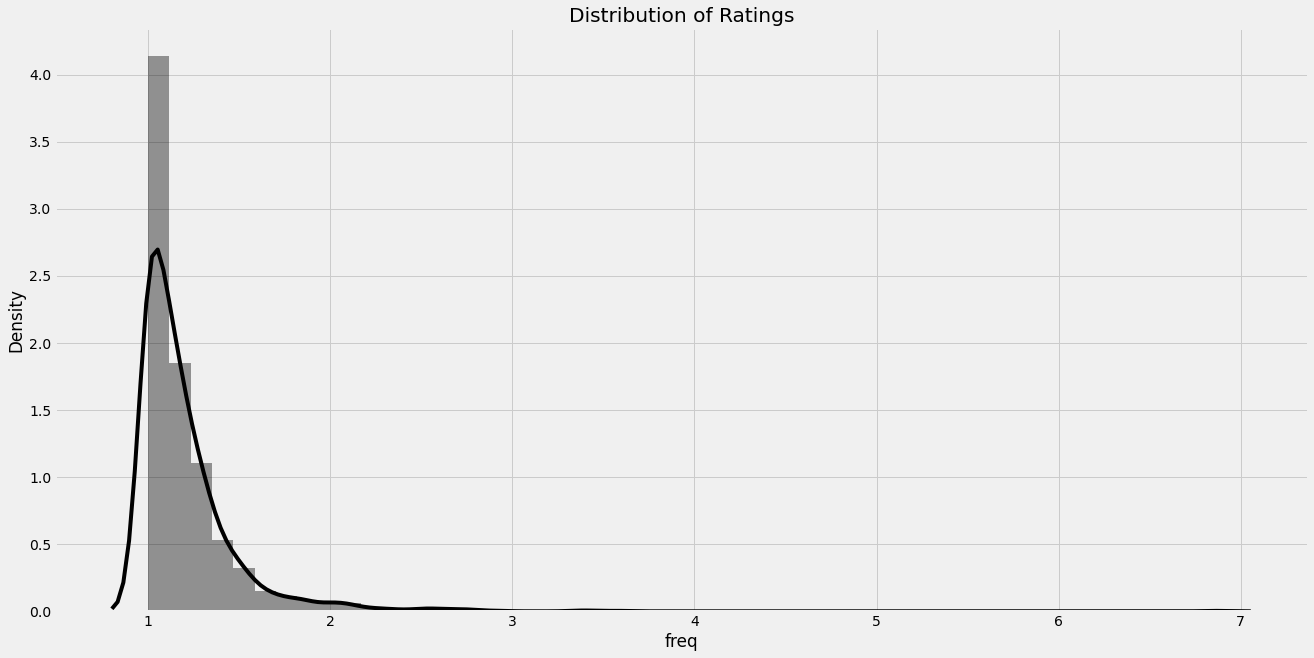

In [72]:
# lets check the Distribution of FREQ across the PRODUCTS

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')
sns.distplot(data['freq'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()

In [1]:
print("The Number of Products that have been ordered ATLEAST on an avg 2 times per user :", data[data["freq"] >= 2]['Name'].count())
print("Percentage of Products that have been ordered ATLEAST on an avg 2 times per user: {0:.2f}%".format((data[data['freq'] <= 2]['Name'].count())/
                                                                      (data.shape[0])))
print("\nThe Number of Products that have been ordered MORE THAN 1 time :", data[data['freq'] > 1]['Name'].count())
print("The Percentage ofProducts that have been ordered MORE THAN 1 time : {0:.2f}%".format((
    data[data['freq'] == 1]['Name'].count())/(data.shape[0])))

NameError: name 'data' is not defined

In [74]:
# lets create an Interactive Function to get the List of Best PRODUCTS from Each SUB CAT

@interact
def genre(category = ['Snack','Health','Confectionary','Chilled','Homeneeds','Bakery','Pantry','Cleaning','Kosher','Fruit&Veg','Cheese','Frozen',
                   'Beverages','Eggs&Dairy','Baby','Personalcare','Warehouse','Snacks','Healthfoods','Breakfast','Tobacco','Pet',
                   'Crackers-Forcheese','Medicine-FirstAid','Medicine-Body','Chocolate-Everyday','Grab&Go','Gum&Mint','Battery',
                   'FreshBread','UHTMilkalternatives','Insect','Lollies','Condiments','CannedToms','Biscuits','Chips-Shapes','CovidSafety',
                   'InsectRepellent','Cleaningsolution','Sweets','Chocolate-Premium','Antipasti&Preserved','ProteinBars&Balls','ProteinPowder',
                   'Cooking','Spreads','Jelly','Snacks','Vegetables','XMAS','EntertainingCheese-Soft','Sauce-Stirthrough','CannedFruit&Veg',
                   'CannedFish','Asian','Drinks-Milkbased','Sliced','Nutspread','Everyday-Block','Entertaining-Spread','Icecream&Sorbet',
                   'Medicine-pickmeup','Essentials','Nonalcoholic','NonAlc','Seafood','Party&Picnic','Tools','Fruit','Kombucha&Tea',
                   'Savoury','Cream','Kombocha&Tea','Food-Baby','Babyneeds','Nappies&Wipes','Softdrinks','Shower','Consumable','Sanitsers',
                   'Grated','Beverages','Party','Fetta','Dips','Cheese(DairyFree)','Device','ColdDrinks','Meat&Poultry','Chips-Premium',
                   'Oils&Vinegar','HealthySnacks','HealthlySnacks','Sugar','Eggs&Dairy','Chocolate-Gifting','Dessert','Condiments(Vegan)',
                   'Stock&Gravy','Sunscreen','Honey','Bars','Cereal','Cigarettes','Wipes','Chips-Popcorn','Coconutwater','Oral','Jam',
                   'Yoghurt-Pouch','Toboccoaccessories','Grooming','Chips-Mexican','Yogurt','Yogurt-Pouch','Yogurt-Flip','Chocolate-Mid',
                   'Cat-Food','Sanitisers&COVIDsafety','UHTMilk','Medicine-painrelief','Sauce-Red','Sauce-Cream','Barsnacks','SmallGoods',
                   'SaladServers','Mexican','Deodorant','POWDER','Pasta(GlutenFree)','Dog-Food','Haircare','Shaving','Naturalnuts','Laundry',
                   'AirFreshener','Plantbased-Meat&Poultry','CleaningProducts','DishwashLiquid','RinseAid','LaundryPowder',
                   'Condiment-SaladDressing','CannedBeans&Spag','InstantNoodles','Crackers-Ricecrackers','Yoghurt-GreekPot','Water',
                   'Drinks-Coffee','Butter&Margarine','Intimate','HomeNeeds','Pies','Vegan-Meat','Chips-Veg','Mixers','Dishes',
                   'Mexican(FODMAP)','Condiments(FODMAP)','Sauce-Red(FODMAP)','Rice','PickledVegetables','ReadyMeals','Cheese-Other',
                   'Bags&Wraps','Chips-FamilyFaves','HotDrinks-Coffee','Breakfast','Pantry','MilkFreshPET','Bagels','Relaxation','Kefir',
                   'Meal(glutenfree)','Pizza','Tissues&Toiletpaper','Fish','Bath&Skincare','Tech','Eggs','Indian','EntertainingCheese-Hard',
                   'Shoes','WomensHealth','Cocktail','EntertainingCheese-Blue','Meats&Poultry','ChilledPasta&Sauce','HotDrinks-Tea','Lips',
                   'ItalianStyle','CookingCheese','Condiments-Mustard','Condiments-BBQ','Potato','Salt&Pepper','Wraps','Drinks','Pasta',
                   'Salt','Condiments–Mustard','EntertainingCheese-Club','Outdoor','HomeSolutions','Buns','Sweetspreads',
                   'Cocktail-Nonalcoholic','OtherDrinks','Desserts(SugarFree)','KidsJuice','Juice','Eggs&Diary','AlternativeMilk','Crackers',
                   'Soap','Hand&BodyWash','Drinks-Fruit','BakedGoods','Sport&Energy','Condiments-Mayo','Medical-FirstAid','Games','Dog-Treat',
                   'Cordial','Popcorn','Entertaining-Dutch','Desserts','Bags','VegetarianMeat','Pate','Savouryspreads','Nutfreespread',
                   'ChilledDesserts','Biscuts','Waffels','Frozensummersnacks']):
    x = data['category'].str.split('|')
    d = data.drop(['category'], axis = 1)
    x = pd.concat([d, x], axis = 1)
    x = x.explode('category')
    x= x[(x['category'] == category)][['Name','freq']].sort_values(by = 'freq',
                                                                 ascending = False).reset_index(drop = True).head(10)
    return x


interactive(children=(Dropdown(description='category', options=('Snack', 'Health', 'Confectionary', 'Chilled',…

In [75]:
!pip install mlxtend

In [76]:
from mlxtend.preprocessing import TransactionEncoder

# lets split all the CATEGORY into Transactions
category = data['category'].str.split('|')
te = TransactionEncoder()
category = te.fit_transform(category)
category = pd.DataFrame(category, columns = te.columns_)

category.head(2)

,AirFreshener,AlternativeMilk,Antipasti&Preserved,Asian,Baby,Babyneeds,Bags,Bags&Wraps,BakedGoods,Bakery,...,Waffels,Warehouse,Water,Wipes,Women'sHealth,Wraps,XMAS,Yoghurt-GreekPot,Yoghurt-Pouch,Yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
# lets convert this data into boolean so that we can perform calculations
category = category.astype('int')
category.insert(0, 'Name', data['Name'])
category.head(2)

,Name,AirFreshener,AlternativeMilk,Antipasti&Preserved,Asian,Baby,Babyneeds,Bags,Bags&Wraps,BakedGoods,...,Waffels,Warehouse,Water,Wipes,Women'sHealth,Wraps,XMAS,Yoghurt-GreekPot,Yoghurt-Pouch,Yogurt
0,180 Degrees Almond Oat Crackers 150g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,180 Degrees Parmesan Oat Crackers 135g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# lets Transpose the Dataset
category = category.transpose()
category = category.rename(columns = category.iloc[0])
category = category.drop(category.index[0])
category = category.astype(int)

# lets check the head of CATEGORY
category.head(2)

,180 Degrees Almond Oat Crackers 150g,180 Degrees Parmesan Oat Crackers 135g,280G MRS MACS BIG AUSSIE SAUSAGE ROLL,3M MASKS 3 PACK,50G Cadbury Crunchie,50G Cadbury Fruit & Nut,50G Cadbury Marvellous Creations Jelly Popping Candy,50G PRIMO STACKERS MILD SALAMI CHEDDAR CHEESE & CRACKERS,52G Cadbury Cherry Ripe,64G EXTRA PEPPERMINT BOTTLE,...,ZOOSH DIP ONION & BACON 185GM,ZOOSH DIP SPICY MEXICAN 185GM,ZOOSH DIP SWEET CHILLI & LIME 185GM,ZOOSH MOROCCAN DIP 185GM,ZOOSH SRIRACHA DIP 185GM,ZOVIRAX ANTIVIRAL COLDSORE 2G,Zest Byron Bay Butter Chicken Recipe Base 175g,Zest Byron Bay Rogan Josh Recipe Base 175g,Zuchinni,macamilk Australian Macadamia Milk - Barista 1L
AirFreshener,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AlternativeMilk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
# making a recommendation engine for getting similar PRODUCTS

@interact
def recommendation_products(products = list(category.columns)):    
    similar_product = category.corrwith(category[products])
    similar_product = similar_product.sort_values(ascending=False)
    similar_product = similar_product.iloc[1:]
    return similar_product.head(20)

interactive(children=(Dropdown(description='products', options=('180 Degrees Almond Oat Crackers 150g', '180 D…